In [154]:
pip install control matplotlib numpy scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importamos las librerias
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np 
import scipy.signal as signal

In [4]:

# Definir el controlador P
kp = 0.5
ki = 0
kd = 0
controlador_pid = ctrl.TransferFunction([kd, kp, ki], [1, 0])



In [5]:
# Definir la función de transferencia de la planta
num_planta = [57.22]
den_planta = [1, 8.75, 31.46, 0, 0]
planta = ctrl.TransferFunction(num_planta, den_planta)



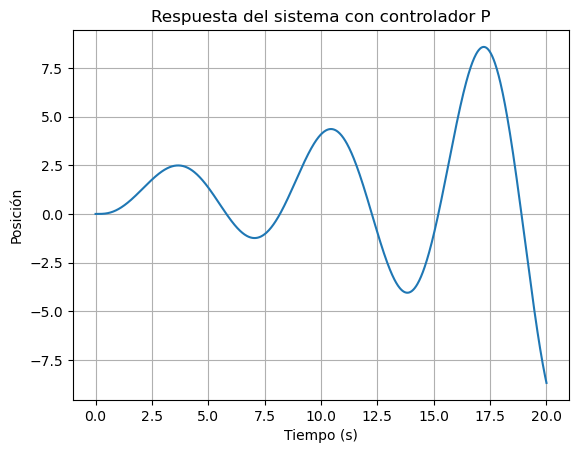

In [6]:
# Crear el sistema de lazo cerrado
sistema_lazo_cerrado = ctrl.feedback(planta * controlador_pid)

# Definir el tiempo de simulación
tiempo_simulacion = np.linspace(0, 20, 1000)  # Corregir aquí

# Obtener la respuesta del sistema
tiempo, respuesta = ctrl.step_response(sistema_lazo_cerrado, tiempo_simulacion)

# Graficar la respuesta
plt.plot(tiempo, respuesta)
plt.title('Respuesta del sistema con controlador P')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición')
plt.grid(True)
plt.show()

In [7]:

# Definir el controlador PI
kp = 0.5
ki = 0.5
kd = 0
controlador_pid = ctrl.TransferFunction([kd, kp, ki], [1, 0])


In [8]:
# Definir la función de transferencia de la planta
num_planta = [57.22]
den_planta = [1, 8.75, 31.46, 0, 0]
planta = ctrl.TransferFunction(num_planta, den_planta)



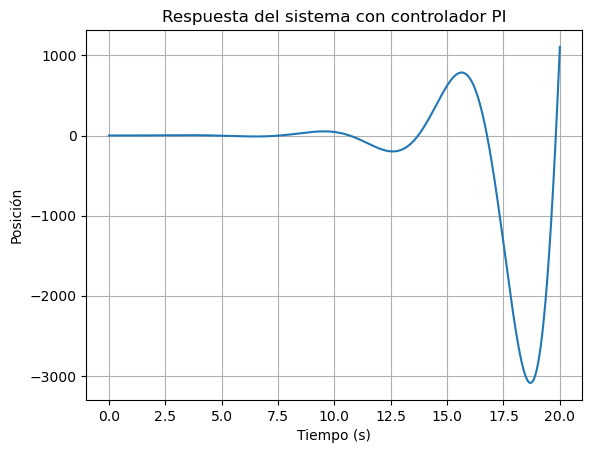

In [9]:
# Crear el sistema de lazo cerrado
sistema_lazo_cerrado = ctrl.feedback(planta * controlador_pid)

# Definir el tiempo de simulación
tiempo_simulacion = np.linspace(0, 20, 1000)  # Corregir aquí

# Obtener la respuesta del sistema
tiempo, respuesta = ctrl.step_response(sistema_lazo_cerrado, tiempo_simulacion)

# Graficar la respuesta
plt.plot(tiempo, respuesta)
plt.title('Respuesta del sistema con controlador PI')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición')
plt.grid(True)
plt.show()

In [10]:

# Definir el controlador PD
kp = 0.5
ki = 0
kd = 2
controlador_pid = ctrl.TransferFunction([kd, kp, ki], [1, 0])


In [11]:
# Definir la función de transferencia de la planta
num_planta = [57.22]
den_planta = [1, 8.75, 31.46, 0, 0]
planta = ctrl.TransferFunction(num_planta, den_planta)



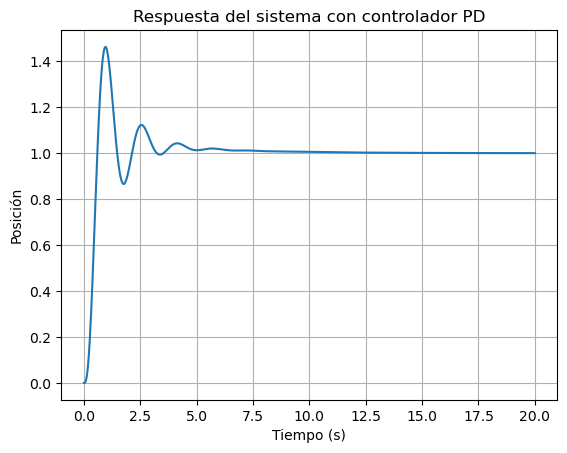

In [12]:
# Crear el sistema de lazo cerrado
sistema_lazo_cerrado = ctrl.feedback(planta * controlador_pid)

# Definir el tiempo de simulación
tiempo_simulacion = np.linspace(0, 20, 1000)  # Corregir aquí

# Obtener la respuesta del sistema
tiempo, respuesta = ctrl.step_response(sistema_lazo_cerrado, tiempo_simulacion)

# Graficar la respuesta
plt.plot(tiempo, respuesta)
plt.title('Respuesta del sistema con controlador PD')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición')
plt.grid(True)
plt.show()

In [13]:

# Definir el controlador PD
kp = 0.545
ki = 0
kd = 0.5
controlador_pid = ctrl.TransferFunction([kd, kp, ki], [1, 0])


In [14]:
# Definir la función de transferencia de la planta
num_planta = [57.276]
den_planta = [1, 8.75, 31.22, 28.64, 31.22]
planta = ctrl.TransferFunction(num_planta, den_planta)



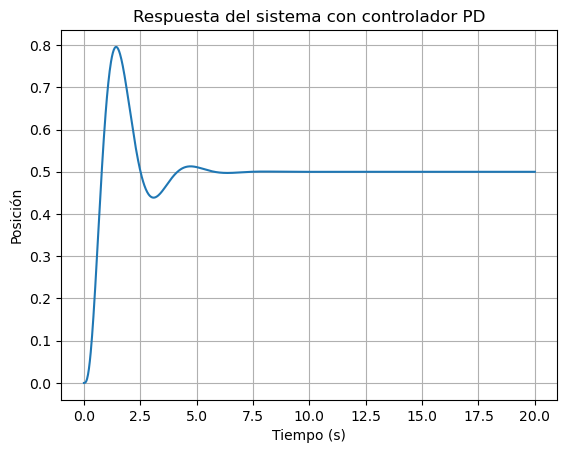

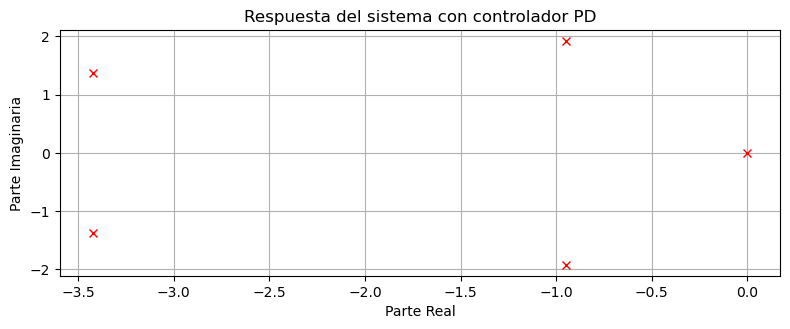

In [15]:
# Crear el sistema de lazo cerrado
sistema_lazo_cerrado = ctrl.feedback(planta * controlador_pid)

# Definir el tiempo de simulación
tiempo_simulacion = np.linspace(0, 20, 1000)  # Corregir aquí

# Obtener la respuesta del sistema
tiempo, respuesta = ctrl.step_response(sistema_lazo_cerrado, tiempo_simulacion)

# Graficar la respuesta
plt.plot(tiempo, respuesta)
plt.title('Respuesta del sistema con controlador PD')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición')
plt.grid(True)
plt.show()


# Obtener y graficar los polos del sistema
polos_sistema = ctrl.pole(sistema_lazo_cerrado)
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.title('Respuesta del sistema con controlador PD')
plt.plot(np.real(polos_sistema), np.imag(polos_sistema), 'rx')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)

plt.tight_layout()
plt.show()

Coordenadas de los polos del sistema:
   Polo: -3.4250 + 1.3751j
   Polo: -3.4250 + -1.3751j
   Polo: -0.9500 + 1.9186j
   Polo: -0.9500 + -1.9186j
   Polo: 0.0000 + 0.0000j

Coordenadas de los ceros del sistema:
   Cero: -1.0900 + 0.0000j
   Cero: 0.0000 + 0.0000j


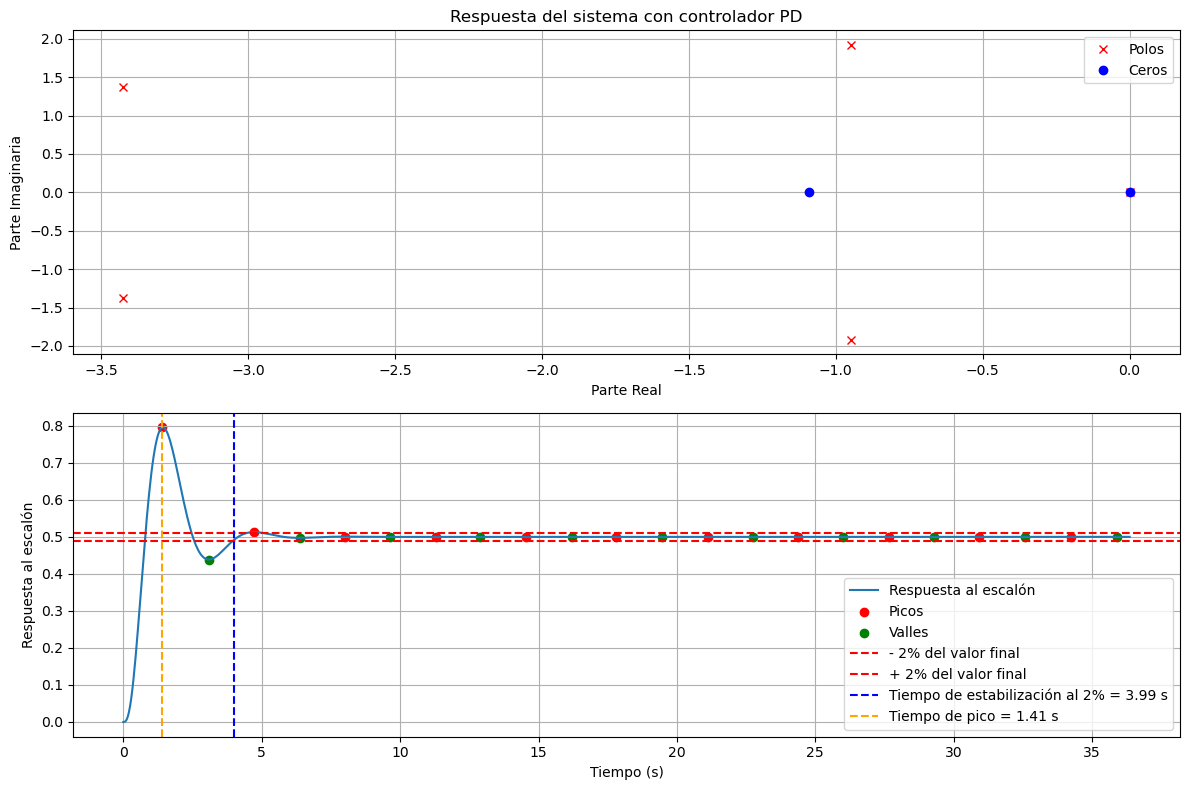

In [16]:

# Definir la función de transferencia de la planta
num_planta = [57.276]
den_planta = [1, 8.75, 31.22, 28.64, 31.22]
planta = ctrl.TransferFunction(num_planta, den_planta)

# Definir el controlador PID
kp = 0.545
ki = 0
kd = 0.5
controlador_pid = ctrl.TransferFunction([kd, kp, ki], [1, 0])

# Crear el sistema de lazo cerrado
sistema_lazo_cerrado = ctrl.feedback(planta * controlador_pid)

# Obtener polos y ceros del sistema
polos_sistema = ctrl.pole(sistema_lazo_cerrado)
ceros_sistema = ctrl.zero(sistema_lazo_cerrado)
polo_dominante = min(polos_sistema, key=lambda x: abs(np.imag(x)))

# Simular la respuesta al escalón
t, y = ctrl.step_response(sistema_lazo_cerrado)

# Calcular el tiempo de estabilización al 2%
ess_2_low = y[-1] - (0.02 * y[-1])
ess_2_high = y[-1] + (0.02 * y[-1])

# Encontrar el tiempo de estabilización al 2%
stabilization_time = None
for i in range(len(t)):
    if (ess_2_low <= y[i] <= ess_2_high) and (y[i] - y[i-1]<= 0.02):
        if t[i]>= 3:
            stabilization_time = t[i]
            break



# Encontrar el tiempo de pico
peaks, _ = signal.find_peaks(y)
valleys, _ = signal.find_peaks(-y)
peak_widths = signal.peak_widths(y, peaks)[0]


# Mostrar las coordenadas de los polos y ceros
print("Coordenadas de los polos del sistema:")
for polo in polos_sistema:
    print(f"   Polo: {np.real(polo):.4f} + {np.imag(polo):.4f}j")

print("\nCoordenadas de los ceros del sistema:")
for cero in ceros_sistema:
    print(f"   Cero: {np.real(cero):.4f} + {np.imag(cero):.4f}j")

# Graficar los polos y ceros en el plano complejo
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
plt.subplot(2, 1, 1)
plt.title('Respuesta del sistema con controlador PD')
plt.plot(np.real(polos_sistema), np.imag(polos_sistema), 'rx', label='Polos')
plt.plot(np.real(ceros_sistema), np.imag(ceros_sistema), 'bo', label='Ceros')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.legend()
plt.grid(True)

# Graficar la respuesta al escalón con los puntos relevantes
plt.subplot(2, 1, 2)
plt.plot(t, y, label='Respuesta al escalón')
plt.scatter(t[peaks], y[peaks], color='red', label='Picos')
plt.scatter(t[valleys], y[valleys], color='green', label='Valles')
plt.axhline(ess_2_low, color='red', linestyle='--', label='- 2% del valor final')
plt.axhline(ess_2_high, color='red', linestyle='--', label='+ 2% del valor final')
plt.axvline(stabilization_time, color='blue', linestyle='--', label=f'Tiempo de estabilización al 2% = {stabilization_time:.2f} s')
plt.axvline(t[peaks[np.argmax(peak_widths)]], color='orange', linestyle='--', label=f'Tiempo de pico = {t[peaks[np.argmax(peak_widths)]]:.2f} s')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta al escalón')
plt.grid(True)

plt.tight_layout()
plt.show()

Coordenadas de los polos del sistema:
   Polo: -5.5485 + 0.0000j
   Polo: -1.1009 + 3.1691j
   Polo: -1.1009 + -3.1691j
   Polo: -0.9998 + 0.0000j
   Polo: 0.0000 + 0.0000j

Coordenadas de los ceros del sistema:
   Cero: -0.5450 + 0.0000j
   Cero: 0.0000 + 0.0000j


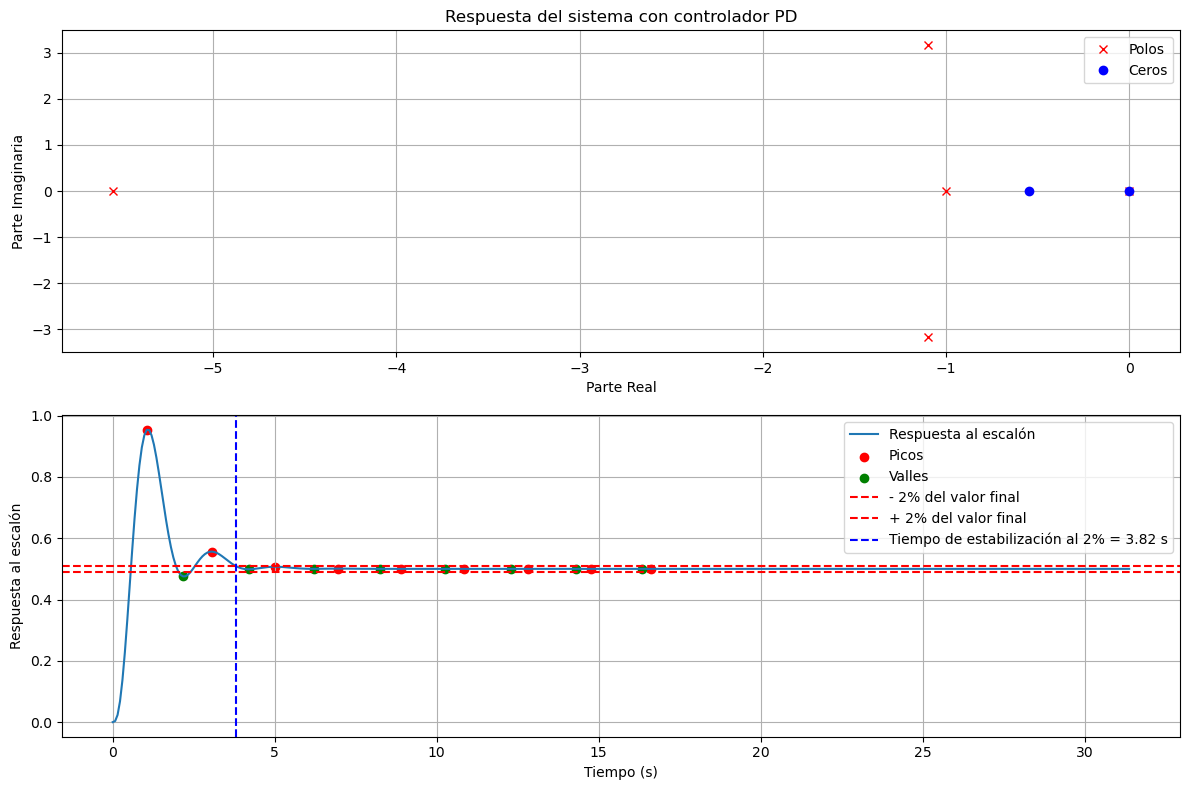

In [17]:

# Definir la función de transferencia de la planta
num_planta = [57.276]
den_planta = [1, 8.75, 31.22, 28.64, 31.22]
planta = ctrl.TransferFunction(num_planta, den_planta)

# Definir el controlador PID
kp = 0.545
ki = 0
kd = 1
controlador_pid = ctrl.TransferFunction([kd, kp, ki], [1, 0])

# Crear el sistema de lazo cerrado
sistema_lazo_cerrado = ctrl.feedback(planta * controlador_pid)

# Obtener polos y ceros del sistema
polos_sistema = ctrl.pole(sistema_lazo_cerrado)
ceros_sistema = ctrl.zero(sistema_lazo_cerrado)
polo_dominante = min(polos_sistema, key=lambda x: abs(np.imag(x)))

# Simular la respuesta al escalón
t, y = ctrl.step_response(sistema_lazo_cerrado)

# Calcular el tiempo de estabilización al 2%
ess_2_low = y[-1] - (0.02 * y[-1])
ess_2_high = y[-1] + (0.02 * y[-1])

# Encontrar el tiempo de estabilización al 2%
stabilization_time = None
for i in range(len(t)):
    if (ess_2_low <= y[i] <= ess_2_high) and (y[i] - y[i-1]<= 0.02):
        if t[i]>= 3:
            stabilization_time = t[i]
            break



# Encontrar el tiempo de pico
peaks, _ = signal.find_peaks(y)
valleys, _ = signal.find_peaks(-y)
peak_widths = signal.peak_widths(y, peaks)[0]


# Mostrar las coordenadas de los polos y ceros
print("Coordenadas de los polos del sistema:")
for polo in polos_sistema:
    print(f"   Polo: {np.real(polo):.4f} + {np.imag(polo):.4f}j")

print("\nCoordenadas de los ceros del sistema:")
for cero in ceros_sistema:
    print(f"   Cero: {np.real(cero):.4f} + {np.imag(cero):.4f}j")

# Graficar los polos y ceros en el plano complejo
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
plt.subplot(2, 1, 1)
plt.title('Respuesta del sistema con controlador PD')
plt.plot(np.real(polos_sistema), np.imag(polos_sistema), 'rx', label='Polos')
plt.plot(np.real(ceros_sistema), np.imag(ceros_sistema), 'bo', label='Ceros')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.legend()
plt.grid(True)

# Graficar la respuesta al escalón con los puntos relevantes
plt.subplot(2, 1, 2)
plt.plot(t, y, label='Respuesta al escalón')
plt.scatter(t[peaks], y[peaks], color='red', label='Picos')
plt.scatter(t[valleys], y[valleys], color='green', label='Valles')
plt.axhline(ess_2_low, color='red', linestyle='--', label='- 2% del valor final')
plt.axhline(ess_2_high, color='red', linestyle='--', label='+ 2% del valor final')
plt.axvline(stabilization_time, color='blue', linestyle='--', label=f'Tiempo de estabilización al 2% = {stabilization_time:.2f} s')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta al escalón')
plt.grid(True)

plt.tight_layout()
plt.show()

[11.69449041 11.87342297 12.0405205  12.81146094 12.53981803 12.07491257
 11.51294158 10.88778821 10.1247336   9.28403548  8.25982652  6.9511958
  5.37421499  2.6458382 ] [ 15  40  65  90 115 140 166 191 216 241 265 290 315 339] [ 28  53  78 104 129 155 180 206 231 257 283 309 335]
Coordenadas de los polos del sistema:
   Polo: -7.0271 + 0.0000j
   Polo: -0.6215 + 4.2579j
   Polo: -0.6215 + -4.2579j
   Polo: -0.4798 + 0.0000j
   Polo: 0.0000 + 0.0000j

Coordenadas de los ceros del sistema:
   Cero: -0.2725 + 0.0000j
   Cero: 0.0000 + 0.0000j


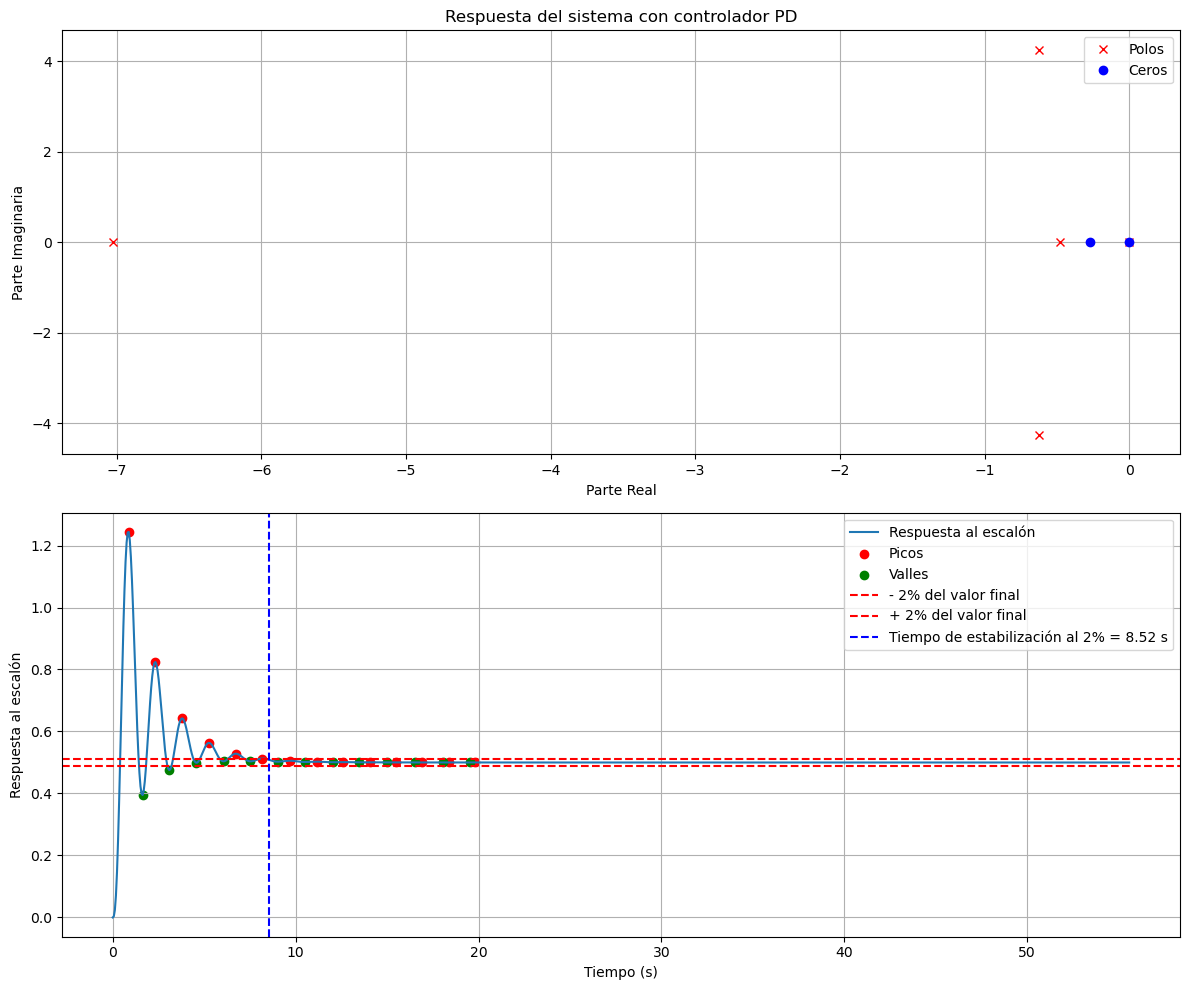

In [18]:

# Definir la función de transferencia de la planta
num_planta = [57.276]
den_planta = [1, 8.75, 31.22, 28.64, 31.22]
planta = ctrl.TransferFunction(num_planta, den_planta)

# Definir el controlador PID
kp = 0.545
ki = 0
kd = 2
controlador_pid = ctrl.TransferFunction([kd, kp, ki], [1, 0])

# Crear el sistema de lazo cerrado
sistema_lazo_cerrado = ctrl.feedback(planta * controlador_pid)

# Obtener polos y ceros del sistema
polos_sistema = ctrl.pole(sistema_lazo_cerrado)
ceros_sistema = ctrl.zero(sistema_lazo_cerrado)
polo_dominante = min(polos_sistema, key=lambda x: abs(np.imag(x)))

# Simular la respuesta al escalón
t, y = ctrl.step_response(sistema_lazo_cerrado)

# Calcular el tiempo de estabilización al 2%
ess_2_low = y[-1] - (0.02 * y[-1])
ess_2_high = y[-1] + (0.02 * y[-1])

# Encontrar el tiempo de estabilización al 2%
stabilization_time = None
for i in range(len(t)):
    if (ess_2_low <= y[i] <= ess_2_high) and (y[i] - y[i-1]<= 0.02):
        if t[i]>= 8:
            stabilization_time = t[i]
            break



# Encontrar el tiempo de pico
peaks, _ = signal.find_peaks(y)
valleys, _ = signal.find_peaks(-y)
peak_widths = signal.peak_widths(y, peaks)[0]
print(peak_widths, peaks, valleys)

# Mostrar las coordenadas de los polos y ceros
print("Coordenadas de los polos del sistema:")
for polo in polos_sistema:
    print(f"   Polo: {np.real(polo):.4f} + {np.imag(polo):.4f}j")

print("\nCoordenadas de los ceros del sistema:")
for cero in ceros_sistema:
    print(f"   Cero: {np.real(cero):.4f} + {np.imag(cero):.4f}j")

# Graficar los polos y ceros en el plano complejo
plt.figure(figsize=(12, 10))  # Ajustar el tamaño de la figura
plt.subplot(2, 1, 1)
plt.title('Respuesta del sistema con controlador PD')
plt.plot(np.real(polos_sistema), np.imag(polos_sistema), 'rx', label='Polos')
plt.plot(np.real(ceros_sistema), np.imag(ceros_sistema), 'bo', label='Ceros')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.legend()
plt.grid(True)

# Graficar la respuesta al escalón con los puntos relevantes
plt.subplot(2, 1, 2)
plt.plot(t, y, label='Respuesta al escalón')
plt.scatter(t[peaks], y[peaks], color='red', label='Picos')
plt.scatter(t[valleys], y[valleys], color='green', label='Valles')
plt.axhline(ess_2_low, color='red', linestyle='--', label='- 2% del valor final')
plt.axhline(ess_2_high, color='red', linestyle='--', label='+ 2% del valor final')
plt.axvline(stabilization_time, color='blue', linestyle='--', label=f'Tiempo de estabilización al 2% = {stabilization_time:.2f} s')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta al escalón')
plt.grid(True)

plt.tight_layout()
plt.show()